# Basic manipulation of real datasets for ML models

The Cleveland heart patient dataset is available at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
It contains 14 attributes use to describe a heart patient collected from
the Cleveland Clinic Foundation.

In [1]:
#Import packages and classes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

NOTE: Install Libraries/Packages in Anaconda (seaborn)

In [2]:
#Reading the csv file with pandas, as a data frame.

heart_df = pd.read_csv('dataset/processed_cleveland.csv')
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  pred_value  
0  0    6           0  
1  3    3           2  
2  2    7           1  
3  0    3           0  
4  0    3           0  


In [3]:
#more viewing options

print(">>>>count<<<<")
print(heart_df.count())
print(">>>>info<<<<")
print(heart_df.info())

>>>>count<<<<
age           303
sex           303
cp            303
trestbps      303
chol          303
fbs           303
restecg       303
thalach       303
exang         303
oldpeak       303
slope         303
ca            303
thal          303
pred_value    303
dtype: int64
>>>>info<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    object 
 12  thal        303 non-null

In [4]:
#ca and thal has missing or unknown data
#non-numeric data will not be interpreted properly, therefore they are removed

heart_df["ca"] = pd.to_numeric(heart_df["ca"], errors='coerce')
heart_df["thal"] = pd.to_numeric(heart_df["thal"], errors='coerce')

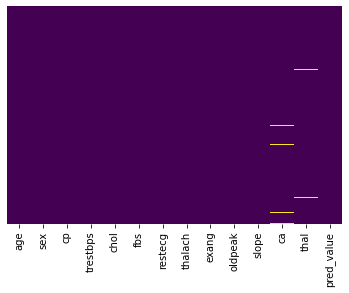

In [5]:
#generating a seaborn heatmap
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [7]:
#yellow lines indicate missing entries from ca and thal
#we need to remove them completely to avoid bias in the model
heart_df.dropna(inplace=True)

#inplace=true modifies the data frame on the fly

print(">>>>count<<<<")
print(heart_df.count())

#following removal of these rows, only 297 rows are left.

>>>>count<<<<
age           297
sex           297
cp            297
trestbps      297
chol          297
fbs           297
restecg       297
thalach       297
exang         297
oldpeak       297
slope         297
ca            297
thal          297
pred_value    297
dtype: int64


In [9]:
# Train and test dataset

#split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('pred_value',
axis=1), heart_df['pred_value'], test_size=0.30, random_state=101)

In [17]:
#create LR instance and fit
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)

#NOTE: Warning ignored for now

C:\Users\Sarvesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#perform prediction and generated confusion matrix
pred_result = lrmodel.predict(X_test)
cm = confusion_matrix(y_test,pred_result)
print(cm)

#generating the classification report
c_report = classification_report(y_test, pred_result)
print(c_report)

[[50  1  0  2]
 [11  3  1  4]
 [ 2  2  3  5]
 [ 0  1  4  1]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.43      0.16      0.23        19
           2       0.38      0.25      0.30        12
           3       0.08      0.17      0.11         6

    accuracy                           0.63        90
   macro avg       0.42      0.38      0.38        90
weighted avg       0.61      0.63      0.60        90



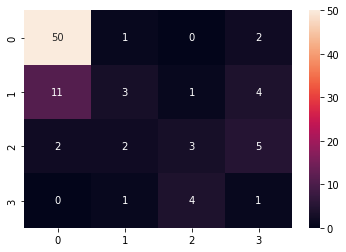

In [19]:
#plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True)
plt.show()